## Building a Movie Content Based Recommendation System

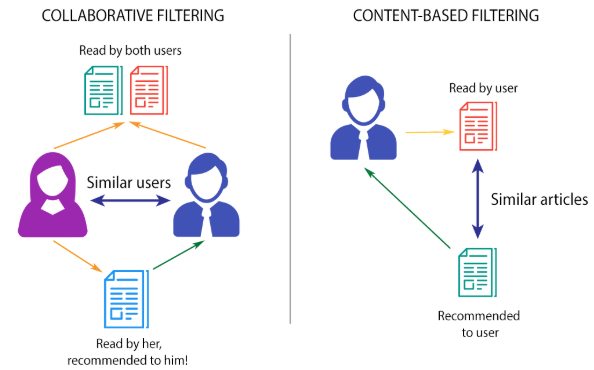

### https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv(r"F:\Data_science_projects\Recommendation_sytem/clean_data.csv")

In [102]:
data.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [103]:
data.shape

(4803, 18)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

### Content Based Recommendation System


In [105]:
#for overview column,,whenever i have to create a recommendation engine,for each and every movie, 
## I have to create vector of matrix

#overview col is a String or we can say its a text data,and our model cant understand these text data,
#so we have to use NLP algo (TF-IDF) to convert this Text data into some numerical-format or vector 
# so that our ML Model can understand


data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [106]:
### import TF-IDF vectorizer to convert text data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer


In [107]:

#ngram_range=(1, 3),-means take the diff combinations of 1 to 3 different kinds of words
#stop_words = 'english'-remove all un-necessary words like the,,that,of,she,he,is
#strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}=used for 
#removing all full stops,commas,all other stuffs

tfv = TfidfVectorizer(min_df=3, max_features=None,
            ngram_range=(1, 3),
            stop_words = 'english')



In [108]:
data['overview'].isnull().sum()

3

In [109]:
# Filling NaNs with empty string
data['overview'] = data['overview'].fillna('')

In [110]:
### make sure data u are going to pass fit_transform of TfidfVectorizer 
# that must be in the form of array or list or Series..

In [111]:
type(data['overview'])

pandas.core.series.Series

In [112]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(data['overview'])


In [113]:
tfv_matrix

#this will gets convert into sparse matrix
#sparase matrix -->> which has less very less non-zero values,ie almost all values are zero

<4803x9919 sparse matrix of type '<class 'numpy.float64'>'
	with 121480 stored elements in Compressed Sparse Row format>

In [114]:
tfv_matrix.shape
# why (4803, 9919),bcz diff diff features just because of diff diff combinations 
# due to ngram(1,3)

## We see that over 9919 different words were used to describe the 4803 movies in our dataset.

(4803, 9919)

In [115]:
tfv_matrix.toarray()[0].shape

(9919,)

In [116]:
tfv_matrix.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [117]:
tfv_matrix[0].T.toarray()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [118]:
## getting TF-IDF matrix of entire data

In [119]:
tfv_matrix.shape

(4803, 9919)

### getting TF-IDF matrix of entire over-view feature

In [120]:
X=tfv.fit_transform(data['overview']).toarray()
df2 = pd.DataFrame(X)

In [121]:
df2

,0,1,2,3,4,5,6,7,8,9,...,9909,9910,9911,9912,9913,9914,9915,9916,9917,9918
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

#### getting TF-IDF matrix of first row of overview

In [123]:

first_row=tfv_matrix[0]

In [124]:
first_row

<1x9919 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [125]:
### to get values of entire first row in the form of array

In [126]:
first_row.toarray() ### Return a array representation

array([[0., 0., 0., ..., 0., 0., 0.]])

In [127]:
first_row.todense() ##Return a dense matrix representation

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [128]:
### lets transpose matrix 
first_row.T.todense()

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [129]:
#after this ,our vector is ready ,so now we have to find similarity value

In [130]:
'''
With this matrix in hand, we can now compute a similarity score. 
There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. 
There is no right answer to which score is the best. Different scores work well in different scenarios and 
it is often a good idea to experiment with different metrics.

'''

'\nWith this matrix in hand, we can now compute a similarity score. \nThere are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. \nThere is no right answer to which score is the best. Different scores work well in different scenarios and \nit is often a good idea to experiment with different metrics.\n\n'

In [131]:
'''
We will be using the cosine similarity to calculate a numeric quantity 
that denotes the similarity between two movies.
We use the cosine similarity score since it is independent of magnitude and is relatively easy 
and fast to calculate. Mathematically, it is defined as follows:


'''

'\nWe will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies.\nWe use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. \nMathematically, it is defined as follows:\n\n\n'

In [132]:
'''
Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. 
Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

'''

"\nSince we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. \nTherefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.\n\n"

In [133]:
# Import linear_kernel
#from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
# cosine_sim = linear_kernel(tfv_matrix, tfv_matrix)

In [134]:
#cosine_sim[1]

### https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists

In [135]:
### have a look above to find dot products in python..

In [136]:
'''
6.8.4. Sigmoid kernel

### https://scikit-learn.org/stable/modules/metrics.html

The function sigmoid_kernel computes the sigmoid kernel between two vectors. 
The sigmoid kernel is also known as hyperbolic tangent, or Multilayer Perceptron 
(because, in the neural network field,  it is often used as neuron activation function). 
It is defined as:

k(x,y)=tanh(gamma*x^T*y + c)
where:

 x, y are the input vectors

 gamma is known as slope

 c is known as intercept

'''

'\n6.8.4. Sigmoid kernel\n\n### https://scikit-learn.org/stable/modules/metrics.html\n\nThe function sigmoid_kernel computes the sigmoid kernel between two vectors. The sigmoid kernel is also known as\nhyperbolic tangent, or Multilayer Perceptron (because, in the neural network field, \nit is often used as neuron activation function). It is defined as:\n\nk(x,y)=tanh(gamma*x^T*y + c)\nwhere:\n\n x, y are the input vectors\n\n gamma is known as slope\n\n c is known as intercept\n\n'

In [137]:
'''
What is kernel??
In other words, a kernel is a function that takes two data points and 
tells you how similar they are, or to be more precise,

a kernel takes two data points and computes the inner product between them 
(in some implicit higher dimensional feature space),and as we know from linear algebra,
the inner product between two vectors is a measure of "similarity" between the vectors.

'''

'\nWhat is kernel??\nIn other words, a kernel is a function that takes two data points and tells you how similar they are, or to be more precise,\na kernel takes two data points and computes the inner product between them (in some implicit higher dimensional feature space),\nand as we know from linear algebra, the inner product between two vectors is a measure of "similarity" between the vectors.\n\n'

In [138]:
from sklearn.metrics.pairwise import sigmoid_kernel
#in sigmoid,we get curve S-shaped,sigmoid basically converts our input between 0 to 1 (1/1+e**-x)
#suppose we want to check similarity between overview 1 and overview 2,
# then we have to apply sigmoid on our vectors to convert its value between 0 to 1 
# as sigmoid converts values between 0 to 1

#suppose after applying sigmoid on overview 2 gives 0.53,
# it means overview 1 is related to overview 2 with a 53% prob.


# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

#why (tfv_matrix, tfv_matrix) so that we can compute 
#how summary 1 is related to summary 1 or summary 1 is related to summary 2
#similarity will be calculated based on the vectors value

In [139]:
sig[0]



#summary 1 is related to summary 1 with 0.76,summary 1 is related to summary 2
# with score 0.761 etc_________

array([0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [140]:
sig[1]

#summary 2 is related to summary 1 with 0.76 ,summary 1 is related to summary 2 with a score of 0.761 etc_________

array([0.76159416, 0.76163649, 0.76159416, ..., 0.76159519, 0.76159416,
       0.76159416])

In [141]:
sig[2]

#summary 3 is related to summary 1 with 0.76 ,summary 1 is related to summary 2 with a score of 0.761 etc_________

array([0.76159416, 0.76159416, 0.76163649, ..., 0.76159484, 0.76159416,
       0.76159416])

In [142]:
data.index

RangeIndex(start=0, stop=4803, step=1)

In [143]:
index=data.index
index

RangeIndex(start=0, stop=4803, step=1)

In [144]:
index[4802]

4802

In [145]:
title=data['original_title']

In [146]:
len(title)

4803

In [147]:
title[0:5]


## title[0:5].to_dict()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [148]:
title[4802]

'My Date with Drew'

In [149]:
## lets store title with its index
dict1={}
for i in range(len(index)):
    dict1.update({title[i]:index[i]})

In [150]:
dict1['Avatar']

0

In [151]:
len(dict1)

4801

In [152]:
dict1

{'Avatar': 0,
 "Pirates of the Caribbean: At World's End": 1,
 'Spectre': 2,
 'The Dark Knight Rises': 3,
 'John Carter': 4,
 'Spider-Man 3': 5,
 'Tangled': 6,
 'Avengers: Age of Ultron': 7,
 'Harry Potter and the Half-Blood Prince': 8,
 'Batman v Superman: Dawn of Justice': 9,
 'Superman Returns': 10,
 'Quantum of Solace': 11,
 "Pirates of the Caribbean: Dead Man's Chest": 12,
 'The Lone Ranger': 13,
 'Man of Steel': 14,
 'The Chronicles of Narnia: Prince Caspian': 15,
 'The Avengers': 16,
 'Pirates of the Caribbean: On Stranger Tides': 17,
 'Men in Black 3': 18,
 'The Hobbit: The Battle of the Five Armies': 19,
 'The Amazing Spider-Man': 20,
 'Robin Hood': 21,
 'The Hobbit: The Desolation of Smaug': 22,
 'The Golden Compass': 23,
 'King Kong': 24,
 'Titanic': 25,
 'Captain America: Civil War': 26,
 'Battleship': 27,
 'Jurassic World': 28,
 'Skyfall': 29,
 'Spider-Man 2': 30,
 'Iron Man 3': 31,
 'Alice in Wonderland': 32,
 'X-Men: The Last Stand': 33,
 'Monsters University': 34,
 'Tra

In [153]:
# create a series of indices and movie titles
indices = pd.Series(data.index, index=data['original_title']).drop_duplicates()

In [154]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [155]:
indices['Newlyweds']

4799

In [156]:
sig[4799]

#summary 4800 is related to summary 1 with 0.76 ,summary 1 is related to summary 2 with a score of 0.761 etc_________

array([0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [157]:
list(enumerate(sig[indices['Newlyweds']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7615941559557649),
 (8, 0.7615941559557649),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615941559557649),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.761

In [158]:
#sort similarity values in ascending order

sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x: x[1], reverse=True)

[(4799, 0.7616364930962501),
 (616, 0.7616064096779229),
 (869, 0.7616034188113526),
 (2689, 0.7616009662467949),
 (3969, 0.7616006697362973),
 (1576, 0.7616006391910145),
 (2290, 0.7616002372286315),
 (504, 0.761599803773003),
 (866, 0.7615992744892874),
 (2962, 0.7615988864385285),
 (242, 0.7615987893047134),
 (4576, 0.761598741040137),
 (1223, 0.7615987285695385),
 (3479, 0.7615987273332918),
 (2688, 0.7615984157494046),
 (3155, 0.7615984047957021),
 (2869, 0.7615983713859866),
 (3559, 0.7615983647826683),
 (4641, 0.7615983542260535),
 (4616, 0.7615981860318553),
 (1071, 0.7615981805189149),
 (3393, 0.7615980973744109),
 (1970, 0.761597837761683),
 (1856, 0.7615977260929616),
 (4591, 0.7615975486850162),
 (1110, 0.7615975382989606),
 (237, 0.7615974569542444),
 (4584, 0.7615974402973578),
 (3583, 0.7615974107626959),
 (1385, 0.7615973986796117),
 (1949, 0.7615972823417676),
 (3253, 0.7615972472705307),
 (1364, 0.7615971453319054),
 (4085, 0.7615970874370888),
 (3309, 0.7615969994380

In [159]:
sigma=sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x: x[1], reverse=True)

In [160]:
sigma[1:11]

[(616, 0.7616064096779229),
 (869, 0.7616034188113526),
 (2689, 0.7616009662467949),
 (3969, 0.7616006697362973),
 (1576, 0.7616006391910145),
 (2290, 0.7616002372286315),
 (504, 0.761599803773003),
 (866, 0.7615992744892874),
 (2962, 0.7615988864385285),
 (242, 0.7615987893047134)]

In [161]:
## to access index of above list
ind=[i[0] for i in sigma[1:11]]
ind

[616, 869, 2689, 3969, 1576, 2290, 504, 866, 2962, 242]

In [162]:
data['original_title'].iloc[ind]
## movies_cleaned_df['original_title'][indices]

616                       Ted 2
869          You, Me and Dupree
2689         Our Family Wedding
3969           Something Wicked
1576                 Bride Wars
2290               Just Married
504     The Secret Life of Pets
866          Bullet to the Head
2962         कभी अलविदा ना कहना
242              Fantastic Four
Name: original_title, dtype: object

In [163]:
data['original_title'][ind]

616                       Ted 2
869          You, Me and Dupree
2689         Our Family Wedding
3969           Something Wicked
1576                 Bride Wars
2290               Just Married
504     The Secret Life of Pets
866          Bullet to the Head
2962         कभी अलविदा ना कहना
242              Fantastic Four
Name: original_title, dtype: object

In [164]:
data['original_title'][[4799, 616, 2689, 869, 3969, 1576, 2290, 1032, 3145, 2531]]

4799                 Newlyweds
616                      Ted 2
2689        Our Family Wedding
869         You, Me and Dupree
3969          Something Wicked
1576                Bride Wars
2290              Just Married
1032     America's Sweethearts
3145                     Amour
2531    Why Did I Get Married?
Name: original_title, dtype: object

In [165]:
#sbse pehle movie ka index nikaalo
#then us movie ki baaki movies se similarity niklegi
#then us similarity ko list m store kro aur enum lagao taaki hume indx mil jaye baad m 
#fir list ko sort kro on the basis of similarity value
#then top 10 nikaalo us sorted list se
#then un top 10 ka index value store kro
#then un index se basicallly movies ke naam nikaal lo

In [231]:
#we have to define such a function that will give recommendations
#def give_rec(movie title, sig=object of sigmoid kernel that we havve created)



def give_rec(title, model):
    
    
    # first it will get the index of title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    model_scores = list(enumerate(model[idx]))

    # Sort the movies 
    model_scores = sorted(model_scores, key=lambda x: x[1], reverse=True)

    # pick top 10 movies and these are recommended movies
    model_scores = model_scores[1:11]

    #indexes of all top 10 movies
    movie_indices = [i[0] for i in model_scores]

    # Top 10 most similar movies
    return data['original_title'].iloc[movie_indices]

In [223]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Avatar',sig)

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
570                           Ransom
Name: original_title, dtype: object

### Credits, Genres and Keywords Based Recommender

### https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system

In [169]:
'''

Now lets try to increase the quality of our recommender with the usage of better metadata
That is exactly ,We are going to build a recommender based on the following metadata: 
the 3 top actors,the director,related genres and the movie keywords

'''

'\n\nNow lets try to increase the quality of our recommender with the usage of better metadata\nThat is exactly ,We are going to build a recommender based on the following metadata: \nthe 3 top actors,the director,related genres and the movie plot keywords\n\n'

In [170]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [171]:
data['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [172]:
### now u have to access director name if job belongs to director , 
# but in above case  , data sounds extremely pretty bad..
### hence it is good to provide some structure 

### For us (human) it is very easy to tell that it is a dictionary data structure, 
### but for Python, it is not easy, until it uses literal_eval function of ast(Abstract Syntax Tree)
# class or eval in-built func..

In [173]:
eval(data['crew'][0])

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [174]:
from ast import literal_eval

In [175]:
literal_eval(data['crew'][0])

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

### https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval
### follow above--

In [176]:
'''
eval: This is very powerful, but is also very dangerous 
if you accept strings to evaluate from untrusted input. 

Suppose the string being evaluated is "os.system('rm -rf /')" ? 
It will really start deleting all the files on your computer.

ast.literal_eval: it is safe to use !


'''

'\neval: This is very powerful, but is also very dangerous if you accept strings to evaluate from untrusted input. \nSuppose the string being evaluated is "os.system(\'rm -rf /\')" ? It will really start deleting all the files on your computer.\n\nast.literal_eval: it is safe to use !\n\n\n'

In [177]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']


In [178]:
## takes 1 min..
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

In [179]:
for i in data['crew'][0]:
    if i['job'] == 'Director':
        print(i['name'])


James Cameron


In [180]:
data['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [181]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name'].strip()
        ## remove un0necessary space if available :
    else:
        return np.nan

In [182]:
data['director'] = data['crew'].apply(get_director)

In [183]:
data['director'].shape

(4803,)

In [184]:
data['director'].isnull().sum()

30

In [185]:
data['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [186]:
data[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [187]:
type(data['cast'][0])

list

In [188]:
### lets try to check if we have any missing value in datafrma or not !
### if yes , then we have to handle that scenario as well...

data[features].isnull().sum()

cast        0
crew        0
keywords    0
genres      0
dtype: int64

In [189]:
'''
def get_list(x):
    
        
    if type(x)==list:
 ## if isinstance(x, list):
        names=[]
        for i in x:
            name=i['name'].strip()
            names.append(name.lower())
            
        
        #Check if more than 3 elements exist. If yes, return only first three. 
        # If no, return entire list.
        if len(names) > 3:
            return names[0:3]
        
        else:
            return names

'''

"\ndef get_list(x):\n    \n        \n    if type(x)==list:\n ## if isinstance(x, list):\n        names=[]\n        for i in x:\n            name=i['name'].strip()\n            names.append(name.lower())\n            \n        \n        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.\n        if len(names) > 3:\n            return names[0:3]\n        \n        else:\n            return names\n\n"

### Data Cleaning for cast crew keywords genres

In [190]:
# Returns the list top 3 elements or entire list , whichever is more..
# remove xtra white spaces that u have

# now we have to apply lowercase on data so that all data will be on same scale..

In [191]:
# Returns the list top 3 elements or entire list , whichever is more..

def get_list(x):
    names=[i['name'].strip().lower() for i in x if type(x)==list]
    ##names=[i['name'].strip() for i in x if isinstance(x, list)]
    
    if len(names)>3:
        return names[0:3]
    else:
        return names

In [192]:
' Shan'.strip().lower()

'shan'

In [193]:
get_list(data['crew'][0])

['stephen e. rivkin', 'rick carter', 'christopher boyes']

In [194]:
get_list(data['crew'][784])

['uwe boll', 'jason rappaport', 'jason rappaport']

In [195]:
df2=data.copy()

In [196]:
for feature in features:
    data[feature] = data[feature].apply(get_list)

In [197]:
data[features]

,cast,crew,keywords,genres
0,"[sam worthington, zoe saldana, sigourney weaver]","[stephen e. rivkin, rick carter, christopher b...","[culture clash, future, space war]","[action, adventure, fantasy]"
1,"[johnny depp, orlando bloom, keira knightley]","[dariusz wolski, gore verbinski, jerry bruckhe...","[ocean, drug abuse, exotic island]","[adventure, fantasy, action]"
2,"[daniel craig, christoph waltz, léa seydoux]","[thomas newman, sam mendes, anna pinnock]","[spy, based on novel, secret agent]","[action, adventure, crime]"
3,"[christian bale, michael caine, gary oldman]","[hans zimmer, charles roven, christopher nolan]","[dc comics, crime fighter, terrorist]","[action, crime, drama]"
4,"[taylor kitsch, lynn collins, samantha morton]","[andrew stanton, andrew stanton, john lasseter]","[based on novel, mars, medallion]","[action, adventure, science fiction]"
...,...,...,...,...
4798,"[carlos gallardo, jaime de hoyos, peter marqua...","[robert rodriguez, robert rodriguez, robert ro...","[united states–mexico barrier, legs, arms]","[action, crime, thriller]"
4799,"[edward burns, kerry bishé, marsha dietlein]","[edward burns, edward burns, edward burns]",[],"[comedy, romance]"
4800,"[eric mabius, kristin booth, crystal lowe]","[carla hetland, harvey kahn, adam sliwinski]","[date, love at first sight, narration]","[comedy, drama, romance]"
4801,"[daniel henney, eliza coupe, bill paxton]","[daniel hsia, daniel hsia]",[],[]


In [198]:
data['cast'][0]

['sam worthington', 'zoe saldana', 'sigourney weaver']

In [172]:
'''

# Function to convert all strings to lower case and strip names of spaces
def clean_data(row):
    if type(x)==list:
        row_updated=[]
        for element in row:
            row_updated.append(str.lower(element.replace(' ','')))
        return row_updated
            
            
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return 
            
'''

In [204]:
data.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,director
0,237000000,"[action, adventure, fantasy]",19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[sam worthington, zoe saldana, sigourney weaver]","[stephen e. rivkin, rick carter, christopher b...",James Cameron
1,300000000,"[adventure, fantasy, action]",285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[johnny depp, orlando bloom, keira knightley]","[dariusz wolski, gore verbinski, jerry bruckhe...",Gore Verbinski
2,245000000,"[action, adventure, crime]",206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[daniel craig, christoph waltz, léa seydoux]","[thomas newman, sam mendes, anna pinnock]",Sam Mendes
3,250000000,"[action, crime, drama]",49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[christian bale, michael caine, gary oldman]","[hans zimmer, charles roven, christopher nolan]",Christopher Nolan
4,260000000,"[action, adventure, science fiction]",49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[taylor kitsch, lynn collins, samantha morton]","[andrew stanton, andrew stanton, john lasseter]",Andrew Stanton


In [205]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
'''
We are now in a position to create our "metadata " as important_feature which is a string 
that contains all the metadata that we want to feed to our vectorizer 
'Countvectorizer' (namely actors, director and keywords)

'''

In [206]:
def create_feature(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])


In [208]:
data.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
director                 30
dtype: int64

In [209]:
data.dropna(subset=['director'],inplace=True)

In [211]:
data['important_feature']=data.apply(create_feature, axis=1)

In [212]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')

In [213]:
count_matrix = count.fit_transform(data['important_feature'])

In [214]:
count_matrix

<4773x10750 sparse matrix of type '<class 'numpy.int64'>'
	with 66282 stored elements in Compressed Sparse Row format>

In [215]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [216]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [217]:
cosine_sim2

array([[1.        , 0.1875    , 0.1875    , ..., 0.        , 0.        ,
        0.        ],
       [0.1875    , 1.        , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.1875    , 0.125     , 1.        , ..., 0.        , 0.16666667,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [219]:
cosine_sim2[0].shape

(4773,)

In [220]:
cosine_sim2[0]

array([1.    , 0.1875, 0.1875, ..., 0.    , 0.    , 0.    ])

In [226]:
give_rec('The Dark Knight Rises',cosine_sim2)

299                         Batman Forever
65                         The Dark Knight
1359                                Batman
428                         Batman Returns
2507                             Slow Burn
119                          Batman Begins
1181                                   JFK
3857                          Wicked Blood
9       Batman v Superman: Dawn of Justice
210                         Batman & Robin
Name: original_title, dtype: object

In [232]:
give_rec('The Godfather',cosine_sim2)

867     The Godfather: Part III
2731     The Godfather: Part II
1525             Apocalypse Now
2792        Glengarry Glen Ross
1209              The Rainmaker
3012              The Outsiders
4209           The Conversation
2649          The Son of No One
1018            The Cotton Club
4124         This Thing of Ours
Name: original_title, dtype: object

In [233]:
give_rec('The Godfather',sig)

2731                             The Godfather: Part II
1873                                         Blood Ties
3730                                              Cargo
867                             The Godfather: Part III
3623                                               Made
3963                                 They Came Together
2464                             The Master of Disguise
2973    For Greater Glory - The True Story of Cristiada
2389                                        Renaissance
1475                                  Playing for Keeps
Name: original_title, dtype: object

In [ ]:
'''

We see that our recommender has been successful in capturing more information due to more metadata
and has given us better recommendations.

It is more likely that Marvels or DC comics fans will like the movies of the same production house. 
Therefore, to our features above we can add production_company . 
We can also increase the weight of the director,by adding the feature multiple times in the soup.

'''